## Creating the ML model using scikit-learn

In this notebook, we create a sample  Logistic Regression model using scikit-learn, and save the model to disk using Python's built in persistence model (pickle)

For this tutorial we will be working with a small subset of Airline Data from BTS (http://www.transtats.bts.gov). The sample data here is cleaned, and has only 4 columns. For actual predictions (with all the available columns), the whole dataset can be easily downloaded from the above link. We'll be trying to predict a classification- delay or no delay.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the data into a pandas Dataframe
df = pd.read_csv('sample_data.csv')

In [3]:
df.head(10)

,ORIGIN,DEST,UNIQUE_CARRIER,DAY_OF_WEEK,DEP_HOUR,ARR_DELAY
0,DEN,ORD,AA,5,6,52.0
1,BOS,DFW,AA,2,5,132.0
2,IAH,LAX,UA,6,14,35.0
3,SFO,ORD,UA,7,8,14.0
4,PHX,SFO,OO,2,11,84.0
5,LAX,LAS,DL,4,11,19.0
6,PHX,LAS,WN,3,15,33.0
7,ORD,ATL,UA,5,10,10.0
8,LAX,DEN,F9,7,19,18.0
9,DEN,SFO,UA,5,11,6.0


In our sample data, we have data about airline delays, with the following columns: 
* ORIGIN (Origin Airport)
* DEST (Destination Airport)
* UNIQUE_CARRIER (Airline  Carrier)
* DAY_OF_WEEK (Day of the Week)
* DEP_HOUR (Hour of Departure)
* ARR_DELAY (Arrival Delay in minutes)

We will build a model to predict whether a flight is delayed more than 5 minutes or not, given the ORIGIN, DEST and UNIQUE_CARRIER

In [4]:
# First, we transform ARR_DELAY into a 1/0 format for Delay/No Delay
# For this we are going to use the Python Lambda function on the dataframe

df['ARR_DELAY'] = df['ARR_DELAY'].apply(lambda x:1 if x>=5 else 0)

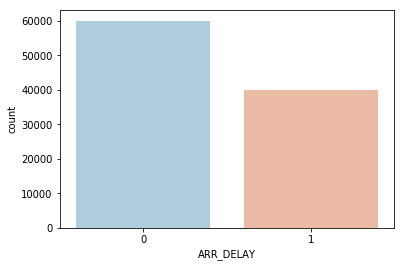

In [5]:
sns.countplot(x='ARR_DELAY', data=df,palette='RdBu_r')

In [6]:
#Convert Categorical Variables into Dummy Variables
df = pd.concat([df,pd.get_dummies(df['UNIQUE_CARRIER'],drop_first=True,prefix="UNIQUE_CARRIER")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN'],drop_first=True,prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEST'],drop_first=True,prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],drop_first=True,prefix="DAY_OF_WEEK")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DEP_HOUR'],drop_first=True,prefix="DEP_HOUR")],axis=1)

In [7]:
#Drop the original Categorical Variables
df.drop(['ORIGIN','DEST','UNIQUE_CARRIER','DAY_OF_WEEK','DEP_HOUR'],axis=1,inplace=True)

In [8]:
#Create the train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('ARR_DELAY',axis=1), 
                                                    df['ARR_DELAY'], test_size=0.30, 
                                                    random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression

#Train the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Predicting on the Test Set
predictions = logmodel.predict(X_test)

In [14]:
predictions.shape

(30000,)

In [10]:
#Model Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

truePos = X_test[((predictions == 1) & (y_test == predictions))]
falsePos = X_test[((predictions == 1) & (y_test != predictions))]
trueNeg = X_test[((predictions == 0) & (y_test == predictions))]
falseNeg = X_test[((predictions == 0) & (y_test != predictions))]

TP = truePos.shape[0]
FP = falsePos.shape[0]
TN = trueNeg.shape[0]
FN = falseNeg.shape[0]

accuracy = float(TP + TN)/float(TP + TN + FP + FN)
print('Accuracy: '+str(accuracy))

             precision    recall  f1-score   support

          0       0.64      0.86      0.73     18037
          1       0.55      0.26      0.35     11963

avg / total       0.60      0.62      0.58     30000

Accuracy: 0.6185333333333334


The model has an overall accuracy of 0.61, which is not too bad given the limited dataset on which we trained the model. We will not try to improve on the model here, as that is not the objective of this tutorial!

## Saving the Model using Pickle

In [11]:
import pickle

with open('logmodel.pkl', 'wb') as fid:
    pickle.dump(logmodel, fid,2)  

In [12]:
#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = df.drop('ARR_DELAY',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

In [15]:
pkl_file = open('cat', 'rb')
index_dict = pickle.load(pkl_file)
cat_vector = np.zeros(len(index_dict))

In [16]:
try:
    cat_vector[index_dict['DAY_OF_WEEK_'+str(day_of_week)]] = 1
except:
    pass
try:
    cat_vector[index_dict['UNIQUE_CARRIER_'+str(unique_carrier)]] = 1
except:
    pass
try:
    cat_vector[index_dict['ORIGIN_'+str(origin)]] = 1
except:
    pass
try:
    cat_vector[index_dict['DEST_'+str(dest)]] = 1
except:
    pass
try:
    cat_vector[index_dict['DEP_HOUR_'+str(dep_hour)]] = 1
except:
    pass
        
pkl_file = open('logmodel.pkl', 'rb')
logmodel = pickle.load(pkl_file)
prediction = logmodel.predict(cat_vector)

FileNotFoundError: [Errno 2] No such file or directory: 'logmodel.pkl'